In [1]:

from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim_models
import jieba.posseg as jp,jieba
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib

D:\ML_ENVS\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
D:\ML_ENVS\lib\site-packages\gensim\corpora\dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict
D:\ML_ENVS\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [10]:
df1 = pd.read_csv('./bug/so details.txt')
df1.info()
df1.head(2)

df1['Tags'] = df1['Tags'].apply(lambda x: x.replace('java', ''))
df1.head(2)

  0%|          | 0/3636 [00:20<?, ?it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   3636 non-null   object 
 1   Title          3636 non-null   object 
 2   Tags           3636 non-null   object 
 3   Score          3636 non-null   int64  
 4   AnswerCount    3636 non-null   int64  
 5   CommentCount   3636 non-null   int64  
 6   FavoriteCount  702 non-null    float64
 7   w2v_title      3636 non-null   object 
 8   w2v_tag        3636 non-null   object 
 9   title+tag      3636 non-null   object 
 10  w2v_title+tag  3636 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 312.6+ KB


CreationDate                                              Title  \
0  2012-07-10T14:09:47.123  How to enable the Java keyword assert in Eclip...   
1  2012-10-08T12:46:21.523  Stack program in Java without using built-in c...   

                         Tags  Score  AnswerCount  CommentCount  \
0   eclipse assert assertions     64            6             1   
1             data-structures      0            3             4   

   FavoriteCount                                          w2v_title  \
0            8.0  [-0.06919835747352668, -0.039465038904121945, ...   
1            NaN  [-0.15744633546897344, 0.026102273325834955, -...   

                                             w2v_tag  \
0  [-0.11689873645082116, 0.3525516837835312, 0.1...   
1  [0.1382400542497635, -0.023948220536112785, -0...   

                                           title+tag  \
0  How to enable the Java keyword assert in Eclip...   
1  Stack program in Java without using built-in c...   

                                       w2v_title+tag  
0  [0.24032320082187653, 0.8867842555046082, 0.59...  
1  [0.24032320082187653, 0.42886120080947876, 0.3...

In [11]:
df1['Title'] = df1['Title'].apply(lambda x: x.replace('java', ''))
text = df1['Title'] + pd.Series([' ']*len(df1)) + df1['Tags']
text = text.to_list()
print(len(text))
text[:5]


3636


['How to enable the Java keyword assert in Eclipse program-wise?  eclipse assert assertions',
 'Stack program in Java without using built-in classes  data-structures',
 'How to subclass ConcurrentSkipListMap and set its Comparator?  subclass',
 'I need to be able to capture decimals with only 2 digits after the decimal point , tried this  floating-point int double decimal',
 "Spring test - @ContextConfiguration can't load resource  spring"]

In [12]:
def separate_sentence(text):
    text = text.lower()
    remove_chars = '[·’!"\#$%&\'()＃！（）*+,-./:;<=>?\@，：?￥★、…．＞【】［］《》？“”‘’\[\\]^_`{|}~]+'
    text = re.sub(remove_chars, "", text)

    disease_List = nltk.word_tokenize(text)

    filtered = [w for w in disease_List if(w not in stopwords.words('english'))]

    Rfiltered =nltk.pos_tag(filtered)

    filter_word = [i[0] for i in Rfiltered]
    remove_words = [str(i) for i in range(100)]
    filter_word = [word for word in filter_word if word not in remove_words]
    return filter_word


In [13]:
text = [separate_sentence(i) for i in tqdm(text)]
print(len(text))

100%|██████████| 3636/3636 [00:13<00:00, 273.28it/s]


3636


In [14]:

dictionary = Dictionary(text)

corpus = [dictionary.doc2bow(words) for words in text]

def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=3))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=3))
    ldacm = CoherenceModel(model=ldamodel, texts=text, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()




In [7]:
x = range(1,200)

y = [coherence(i) for i in x]

[(0, '0.024*"android" + 0.017*"java" + 0.013*"using"')]
0.3658488056670449
[(0, '0.026*"android" + 0.025*"spring" + 0.024*"list"'), (1, '0.022*"android" + 0.018*"java" + 0.011*"maven"')]
0.3451115893735227
[(0, '0.036*"list" + 0.029*"android" + 0.018*"springmvc"'), (1, '0.018*"java" + 0.015*"file" + 0.014*"maven"'), (2, '0.034*"android" + 0.030*"spring" + 0.027*"using"')]
0.3483111939991928
[(0, '0.052*"list" + 0.027*"android" + 0.027*"springmvc"'), (1, '0.015*"swing" + 0.015*"java" + 0.013*"class"'), (2, '0.045*"spring" + 0.026*"android" + 0.023*"hibernate"'), (3, '0.032*"android" + 0.026*"using" + 0.025*"java"')]
0.4014073964360083
[(0, '0.057*"list" + 0.027*"android" + 0.027*"input"'), (1, '0.023*"file" + 0.015*"java" + 0.014*"json"'), (2, '0.030*"android" + 0.028*"hibernate" + 0.021*"java"'), (3, '0.035*"android" + 0.027*"using" + 0.024*"java"'), (4, '0.054*"spring" + 0.037*"string" + 0.027*"jpa"')]
0.4184488814455928
[(0, '0.061*"list" + 0.032*"springmvc" + 0.029*"input"'), (1, '0

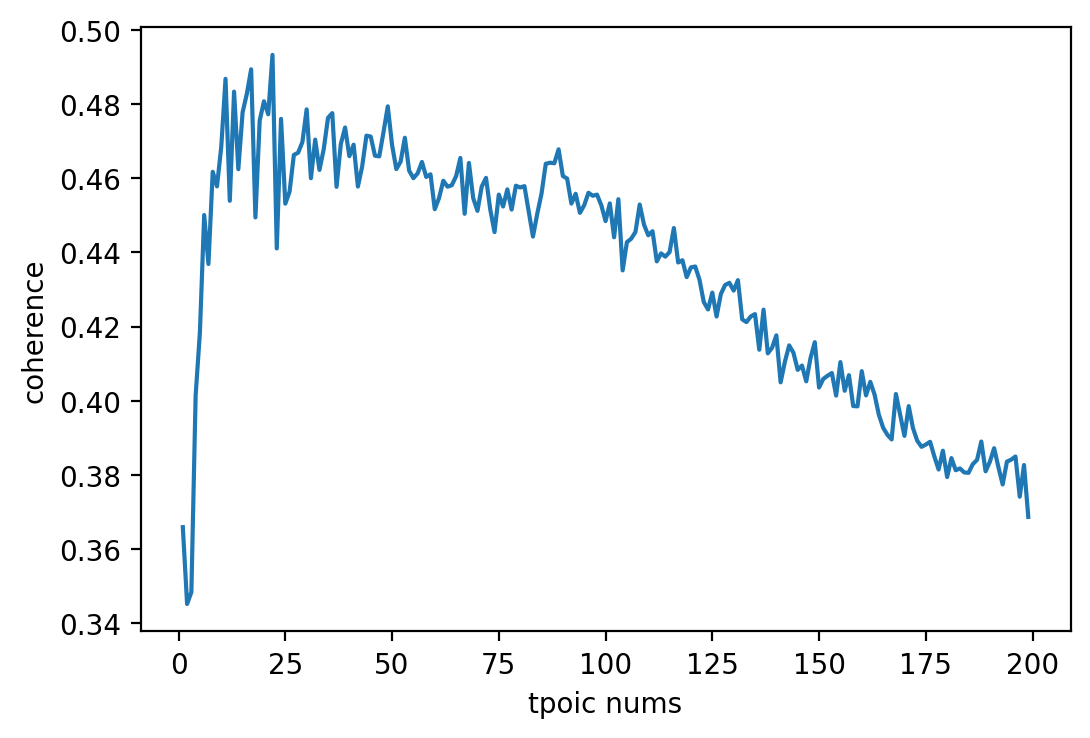

In [8]:
plt.figure(dpi=200)
plt.plot(x, y)
plt.xlabel('tpoic nums')
plt.ylabel('coherence')
# plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.savefig('./pic/bug_coherence.jpg')
plt.show()

In [10]:
new_df = pd.Series(y)
new_df.to_csv('./bug_coherence.txt', index=False)

In [12]:
new_df = pd.read_csv('./bug_coherence.txt')
new_df.info()
y = new_df['0'].to_list()
maxv = y.index(max(y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       199 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [13]:
maxv

21

In [19]:
# y

In [15]:

dictionary = Dictionary(text)

corpus = [dictionary.doc2bow(words) for words in text]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, random_state=100, iterations=50)

ldaCM = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')


for topic in lda.print_topics(num_words=10):
    print(topic)


(0, '0.094*"using" + 0.050*"eclipse" + 0.044*"java" + 0.040*"paho" + 0.040*"mqtt" + 0.037*"one" + 0.032*"android" + 0.024*"message" + 0.023*"testngdataprovider" + 0.022*"client"')
(1, '0.023*"android" + 0.019*"create" + 0.017*"two" + 0.013*"swing" + 0.012*"comparison" + 0.011*"text" + 0.011*"gradle" + 0.011*"multiple" + 0.011*"call" + 0.010*"set"')
(2, '0.072*"spring" + 0.029*"tcp" + 0.023*"jpa" + 0.019*"aspectj" + 0.019*"program" + 0.017*"springboot" + 0.012*"using" + 0.012*"application" + 0.011*"sockets" + 0.011*"java"')
(3, '0.023*"spring" + 0.022*"hibernate" + 0.021*"android" + 0.019*"java" + 0.018*"springmvc" + 0.017*"list" + 0.015*"file" + 0.013*"jsp" + 0.011*"doesnt" + 0.010*"amazonwebservices"')
(4, '0.037*"hibernate" + 0.026*"spring" + 0.025*"java" + 0.022*"class" + 0.021*"file" + 0.016*"every" + 0.013*"project" + 0.013*"mysql" + 0.012*"reading" + 0.010*"exception"')
(5, '0.105*"android" + 0.027*"xml" + 0.023*"imageview" + 0.021*"androidheaderbackground" + 0.021*"effect" + 0.0

In [16]:

plot =pyLDAvis.gensim_models.prepare(lda,corpus,dictionary, sort_topics=False)
pyLDAvis.save_html(plot, './pic/bug_numtopic20.html')



In [3]:

df2 = pd.read_csv('./non_bug/so details.txt')
df2.info()
df2.head(2)

df2['Tags'] = df2['Tags'].apply(lambda x: x.replace('java', ''))
df2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   17986 non-null  object 
 1   Title          17986 non-null  object 
 2   Tags           17986 non-null  object 
 3   Score          17986 non-null  int64  
 4   AnswerCount    17986 non-null  int64  
 5   CommentCount   17986 non-null  int64  
 6   FavoriteCount  3427 non-null   float64
 7   w2v_title      17986 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


CreationDate                                              Title  \
0  2018-08-06T01:49:50.053  Inconsistency in Java's compareTo method on St...   
1  2018-08-06T01:49:50.053  Inconsistency in Java's compareTo method on St...   

          Tags  Score  AnswerCount  CommentCount  FavoriteCount  \
0   comparator      0            0             3            NaN   
1   comparator      0            0             3            NaN   

                                           w2v_title  
0  [0.6235586404800415, 0.0, 0.15243612229824066,...  
1  [0.6235586404800415, 0.0, 0.15243612229824066,...

In [4]:
text = df2['Title'] + pd.Series([' ']*len(df2)) + df2['Tags']
text = text.to_list()
print(len(text))
text[:5]

17986


["Inconsistency in Java's compareTo method on Strings  comparator",
 "Inconsistency in Java's compareTo method on Strings  comparator",
 "Inconsistency in Java's compareTo method on Strings  comparator",
 "Inconsistency in Java's compareTo method on Strings  comparator",
 "Inconsistency in Java's compareTo method on Strings  comparator"]

In [5]:
text = [separate_sentence(i) for i in tqdm(text)]
print(len(text))

100%|██████████| 17986/17986 [00:49<00:00, 365.15it/s]


17986


In [6]:

dictionary = Dictionary(text)

corpus = [dictionary.doc2bow(words) for words in text]

def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)

def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=text, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

In [7]:
x = range(1,200)
# z = [perplexity(i) for i in x]
y = [coherence(i) for i in x]

[(0, '0.025*"java" + 0.021*"android" + 0.018*"list" + 0.014*"spring" + 0.012*"using" + 0.010*"springmvc" + 0.009*"input" + 0.009*"string" + 0.008*"user" + 0.008*"via"')]
0.2688670974232928
[(0, '0.037*"android" + 0.031*"java" + 0.015*"using" + 0.014*"file" + 0.008*"class" + 0.008*"eclipse" + 0.008*"maven" + 0.007*"object" + 0.007*"json" + 0.006*"string"'), (1, '0.041*"list" + 0.032*"spring" + 0.022*"springmvc" + 0.021*"input" + 0.019*"user" + 0.018*"via" + 0.018*"displaying" + 0.018*"vaadin" + 0.018*"userinput" + 0.016*"java"')]
0.35233705532203674
[(0, '0.039*"android" + 0.037*"java" + 0.017*"using" + 0.014*"json" + 0.014*"class" + 0.013*"file" + 0.013*"eclipse" + 0.010*"object" + 0.008*"get" + 0.008*"method"'), (1, '0.061*"list" + 0.031*"input" + 0.031*"string" + 0.029*"springmvc" + 0.029*"user" + 0.027*"via" + 0.027*"java" + 0.027*"displaying" + 0.027*"vaadin" + 0.026*"userinput"'), (2, '0.040*"spring" + 0.019*"android" + 0.014*"hibernate" + 0.012*"maven" + 0.012*"jpa" + 0.011*"usin

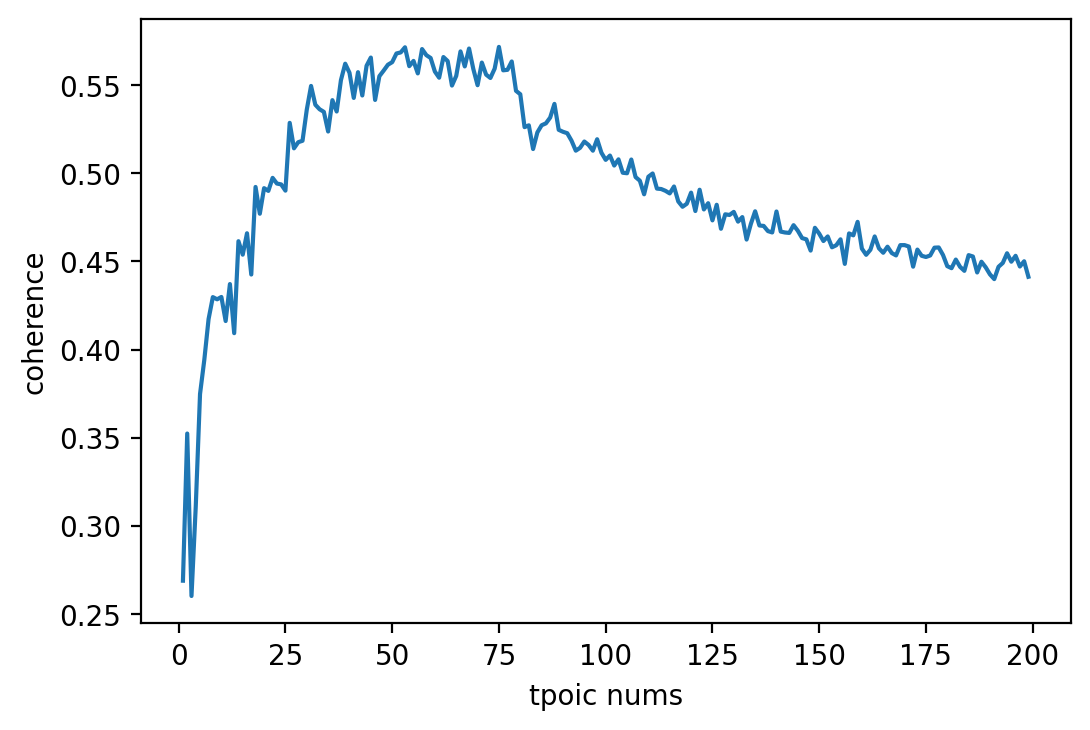

In [8]:
plt.figure(dpi=200)
plt.plot(x, y)
plt.xlabel('tpoic nums')
plt.ylabel('coherence')
matplotlib.rcParams['axes.unicode_minus']=False
plt.savefig('./pic/non_bug_coherence.jpg')
plt.show()

In [9]:
new_df = pd.Series(y)
new_df.to_csv('./non_bug_coherence.txt', index=False)